In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import tensorflow as tf

### Dataset
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http:/ /archive.ics.uci.edu/ml]. Irvine, CA: University, of California,
School of Information and Computer Science.
Donated by: P. SavickyInstitute of Computer Science, AS of CR Czech Republic savicky '@' cs.cas.cz

In [2]:
df = pd.read_csv('magic04.csv')
df

28.7967   16.0021  2.6449  0.3918  0.1982   27.7004    22.011  \
0       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
1      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
2       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
3       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
4       51.6240   21.1502  2.9085  0.2420  0.1340   50.8761   43.1887   
...         ...       ...     ...     ...     ...       ...       ...   
19014   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19015   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19016   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19017  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19018  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       -8.2027   40.092   81.8828  g  
0      -9.9574   6.3609  205.2610  g  
1     -45.2160  76.9600  256.7880  g  
2      -7.1513  10.4490  116.7370  g  
3      21.8393   4.6480  356.4620  g  
4       9.8145   3.6130  238.0980  g  
...        ...      ...       ... ..  
19014   2.8766   2.4229  106.8258  h  
19015  -2.9632  86.7975  247.4560  h  
19016  -9.4662  30.2987  256.5166  h  
19017 -63.8389  84.6874  408.3166  h  
19018  31.4755  52.7310  272.3174  h  

[19019 rows x 11 columns]

In [3]:
cols = ["fLength",
 "fWidth",  
 "fSize",   
"fConc", 
 "fConc1",   
  "fAsym",    
 "fM3Long",  
 "fM3Trans", 
 "fAlpha",   
 "fDist",   
  "class"   
]
df=names=pd.read_csv('magic04.csv', names= cols)
df

fLength    fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
0       28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.0110   
1       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
2      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
3       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
4       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
...         ...       ...     ...     ...     ...       ...       ...   
19015   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19016   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19017   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19018  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19019  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fM3Trans   fAlpha     fDist class  
0       -8.2027  40.0920   81.8828     g  
1       -9.9574   6.3609  205.2610     g  
2      -45.2160  76.9600  256.7880     g  
3       -7.1513  10.4490  116.7370     g  
4       21.8393   4.6480  356.4620     g  
...         ...      ...       ...   ...  
19015    2.8766   2.4229  106.8258     h  
19016   -2.9632  86.7975  247.4560     h  
19017   -9.4662  30.2987  256.5166     h  
19018  -63.8389  84.6874  408.3166     h  
19019   31.4755  52.7310  272.3174     h  

[19020 rows x 11 columns]

In [4]:
df['class'].unique()

array(['g', 'h'], dtype=object)

In [5]:
df['class'] = (df['class']=='g').astype(int)

In [6]:
 df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

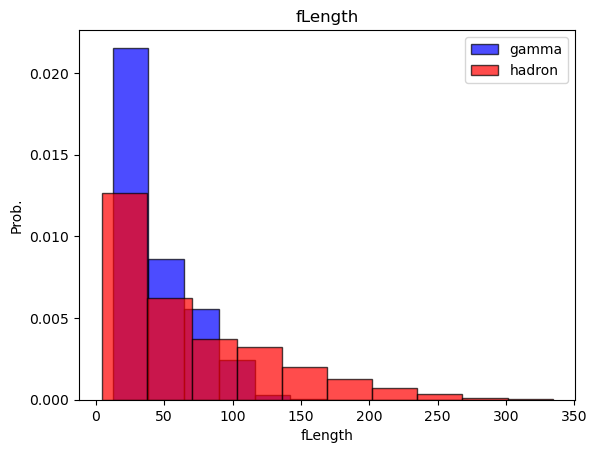

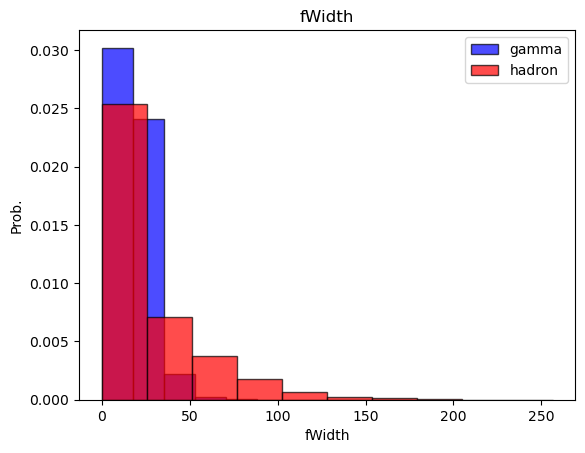

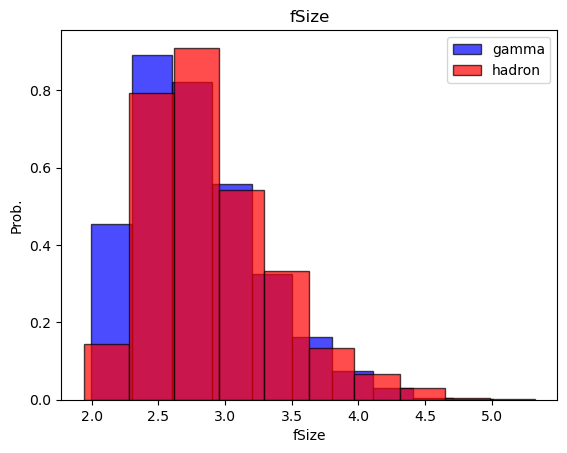

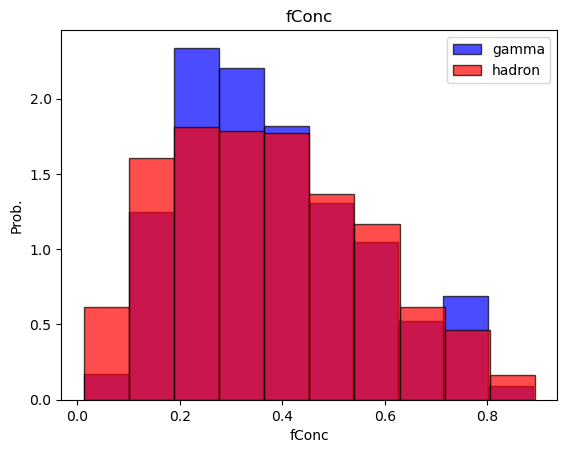

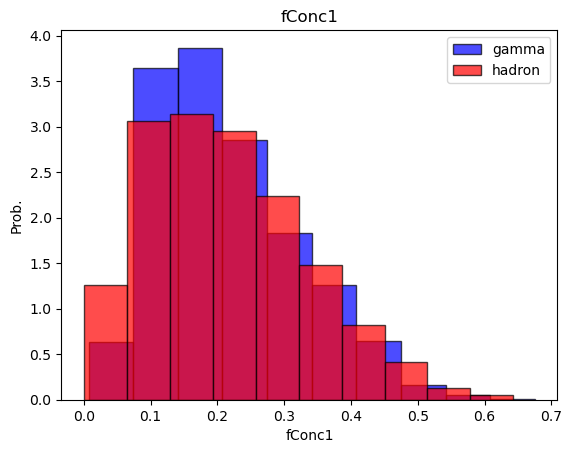

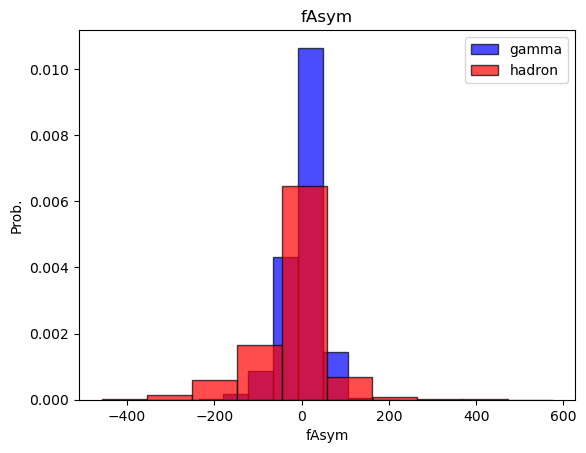

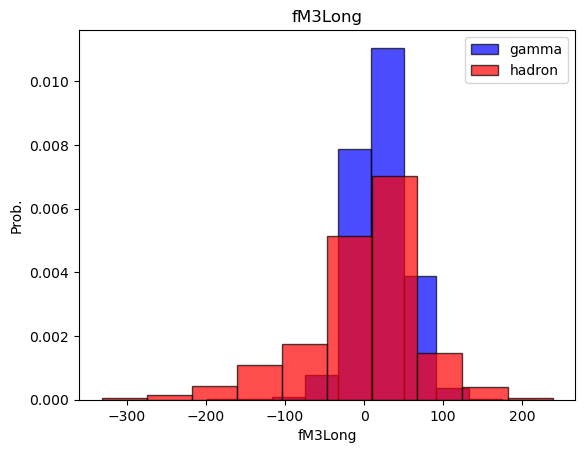

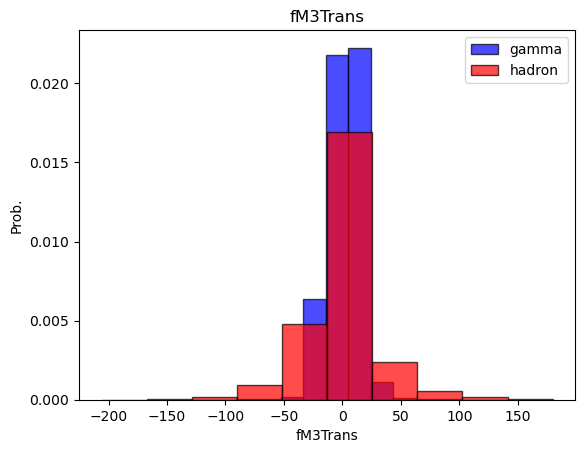

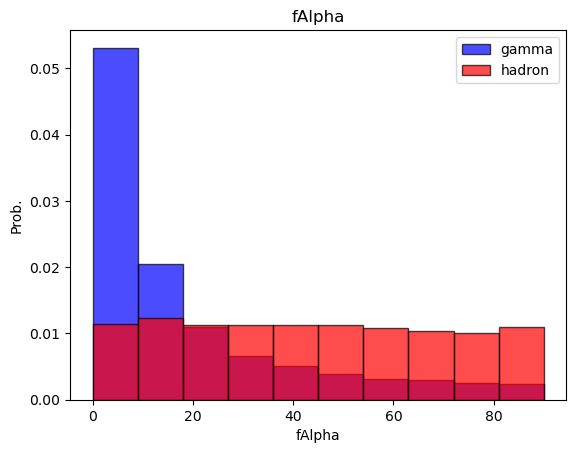

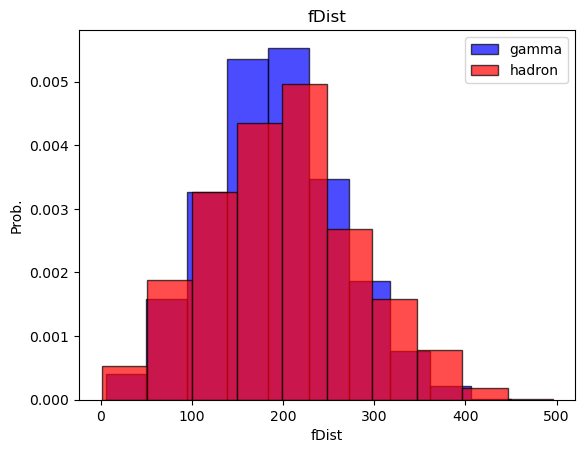

In [9]:
for label in cols[:-1]:
    plt.hist(df[df['class']==1][label], color= 'blue', label='gamma', alpha=0.7, density=True, edgecolor= 'black') 
    plt.hist(df[df['class']==0][label], color= 'red', label='hadron', alpha=0.7, density=True, edgecolor= 'black')
    plt.title(label)
    plt.ylabel('Prob.')
    plt.xlabel(label)
    plt.legend()
    plt.show()

# Train, Validation and Test Dataset: 

In [214]:
shuffled_df = df.sample(frac=1).reset_index(drop=True)

train_end = int(0.6 * len(shuffled_df))
valid_end = int(0.8 * len(shuffled_df))

train = shuffled_df.iloc[:train_end]
valid = shuffled_df.iloc[train_end:valid_end]
test = shuffled_df.iloc[valid_end:]


In [212]:
def scale_dataset(dataframe, oversample=False):
    x = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler= StandardScaler()
    x= scaler.fit_transform(x)

    if oversample:
        ros= RandomOverSampler()
        x,y= ros.fit_resample(x,y)

    data= np.hstack((x, np.reshape(y, (len(y), 1))))
    return data, x, y

In [207]:
print(len(train[train['class']==1]))
print(len(train[train['class']==0]))

7409
4003


In [208]:
train, x_train, y_train= scale_dataset(train, oversample=True)

In [209]:
len(y_train)

14818

In [210]:
print(sum(y_train==1))
print(sum(y_train==0))

7409
7409


In [215]:
train, x_train, y_train= scale_dataset(train, oversample=True)
valid, x_valid, y_valid= scale_dataset(valid, oversample=False)
test, x_test, y_test= scale_dataset(test, oversample=False)

# kNN

In [216]:
knn_model= KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [217]:
y_pred= knn_model.predict(x_test)

In [218]:
y_pred

array([1, 1, 1, ..., 0, 1, 1])

In [219]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.74      0.75      1372
           1       0.86      0.86      0.86      2432

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



# Naive Bayes:

In [220]:
nb_model= GaussianNB()
nb_model= nb_model.fit(x_test, y_pred)

In [221]:
y_pred= nb_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.42      0.53      1372
           1       0.73      0.90      0.81      2432

    accuracy                           0.73      3804
   macro avg       0.72      0.66      0.67      3804
weighted avg       0.72      0.73      0.71      3804



# Logistic Regression:

In [222]:
lg_model= LogisticRegression()
lg_model= lg_model.fit(x_train, y_train)

In [223]:
y_pred= lg_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.72      0.71      1372
           1       0.84      0.82      0.83      2432

    accuracy                           0.78      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.78      0.79      3804



# Support Vector Machines:

In [224]:
svm_model= SVC()
svm_model= svm_model.fit(x_train, y_train)

In [225]:
y_pred= svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1372
           1       0.88      0.91      0.89      2432

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



# Neural Network 

In [226]:
#import tf_keras
#from tf_keras import layers
#import tensorflow_model_optimization as tfmot

In [227]:
#from keras.models import Sequential
#from keras.layers import Dense

#model = Sequential([
#input(shape=(10,)),
#    Dense(32, activation='relu' ), # İlk katmanda input_shape tanımlanmış
#    Dense(32, activation='relu'),
#    Dense(1, activation='sigmoid')
#])

#nn_model = Sequential()
 #   nn_model.add(Dense(32, activation='relu', input_shape=(10,))),  
  #  nn_model.add(Dense(32, activation='relu')),
   # nn_model.add(Dense(1, activation='sigmoid'))



#nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy',
 #               metrics=['accuracy'])

In [51]:
#from tensorflow.keras.layers import Dense, Input
#i#nputs = Input(shape=(10,))
#n#n_model= tf.keras.Sequential([
  #  tf.keras.layers.Dense(32, activation='relu', (inputs)),
   # tf.keras.layers.Dense(32, activation='relu'),
   # tf.keras.layers.Dense(1, activation='sigmoid'),
#]) #     
#
#nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy',
            #    metrics=['accuracy'])

In [134]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Binaty crossentropy')
    plt.legend()
    plt.show()

def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label= 'accuracy')
    plt.plot(history.history['val_accuracy'], label= 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Binary crossentopy')
    plt.legend()
    plt.grid(True)
    plt.show()

In [135]:
nn_model= tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid',)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy',
                metrics=['accuracy'])
history= nn_model.fit(
    x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0
)

history= nn_model.fit(
    x_train, y_train, epochs=100, batch_size=32, validation_split=0.2
)

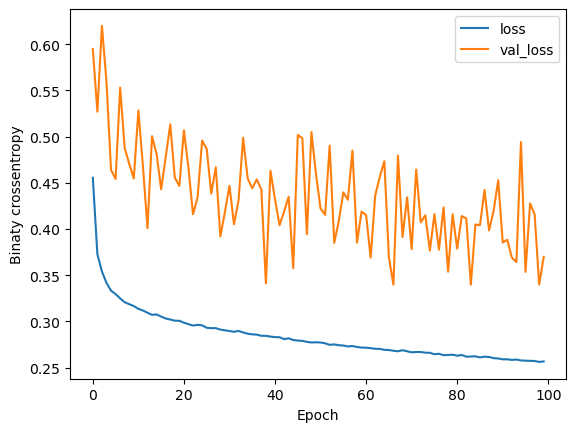

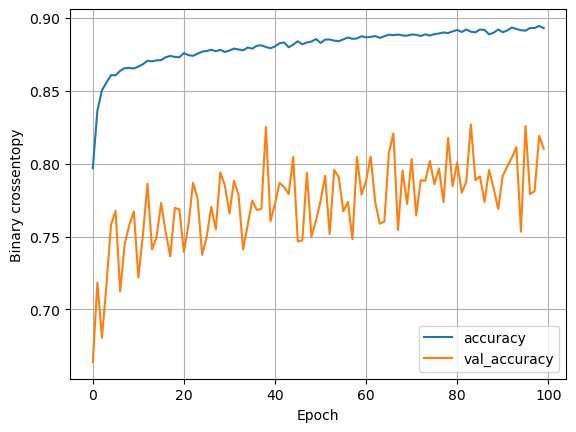

In [132]:
plot_loss(history)
plot_accuracy(history)

In [139]:
def plot_history(history):
    fig, (ax1, ax2)= plt.subplots(1, 2, figsize=(8, 6))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binaty crossentropy')
    ax1.grid(True)

    ax2.plot(history.history['accuracy'], label= 'accuracy')
    ax2.plot(history.history['val_accuracy'], label= 'val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)
    plt.show()

In [140]:
def train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    
    nn_model= tf.keras.Sequential([
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation='sigmoid',)
    ])
    
    nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy',
                metrics=['accuracy'])
    history= nn_model.fit(
        x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose= 0
    )
    return nn_model, history

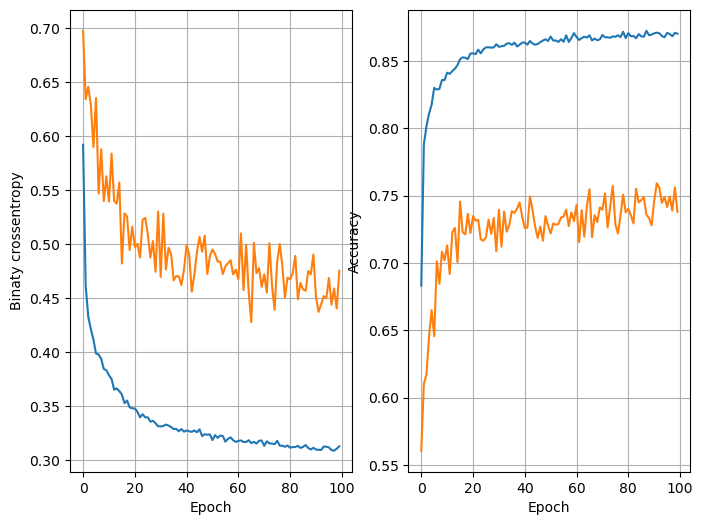

In [141]:
plot_history(history)

16 nodes, dropout 0, lr 0.01, batch size 32


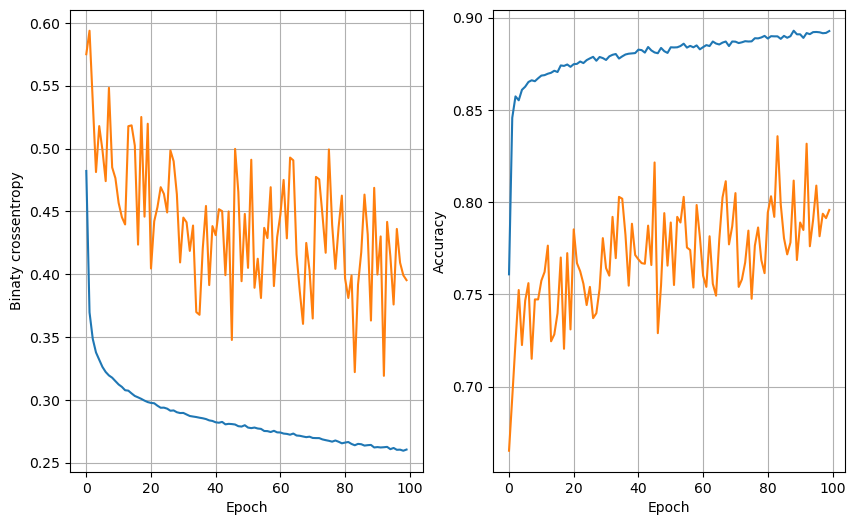

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - accuracy: 0.8701 - loss: 0.3381
16 nodes, dropout 0, lr 0.01, batch size 64


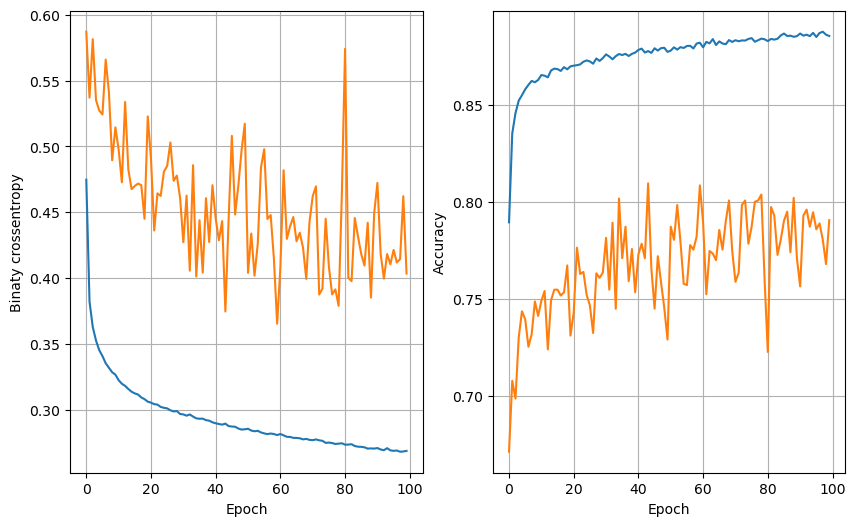

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - accuracy: 0.8702 - loss: 0.3305
16 nodes, dropout 0, lr 0.01, batch size 128


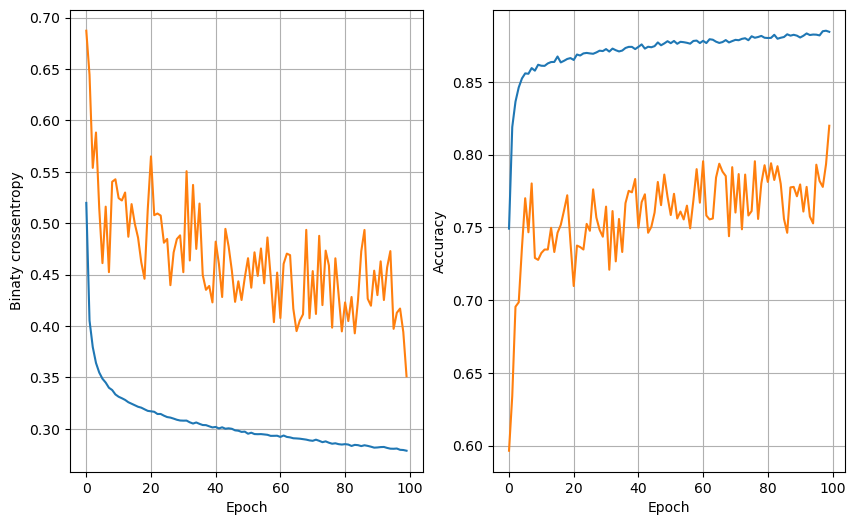

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - accuracy: 0.8564 - loss: 0.3531
16 nodes, dropout 0, lr 0.005, batch size 32


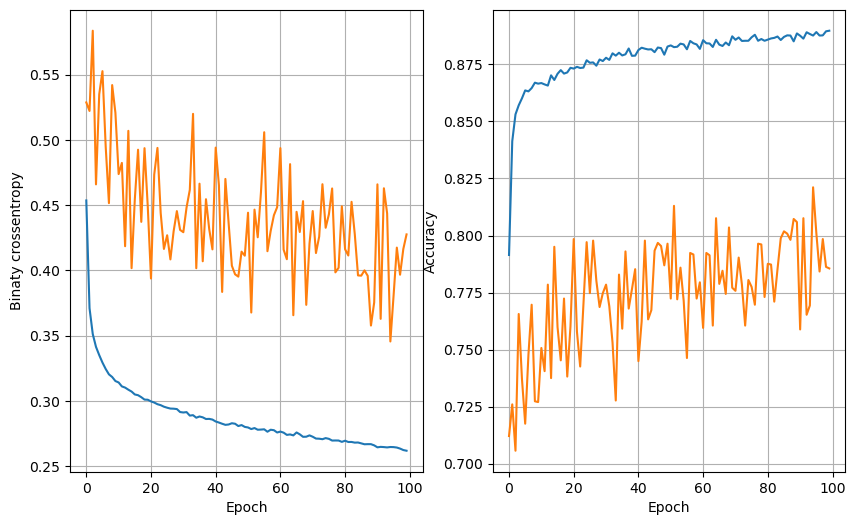

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - accuracy: 0.8779 - loss: 0.3240
16 nodes, dropout 0, lr 0.005, batch size 64


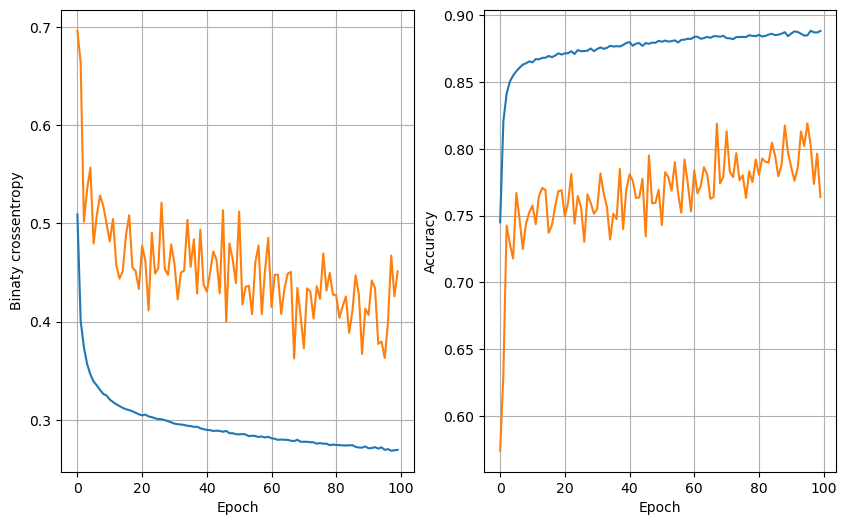

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - accuracy: 0.8738 - loss: 0.3191
16 nodes, dropout 0, lr 0.005, batch size 128


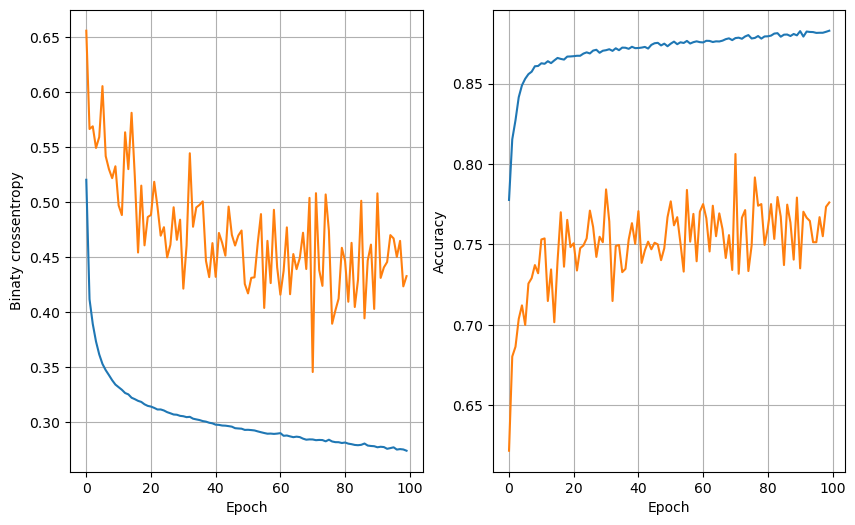

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - accuracy: 0.8672 - loss: 0.3297
16 nodes, dropout 0, lr 0.001, batch size 32


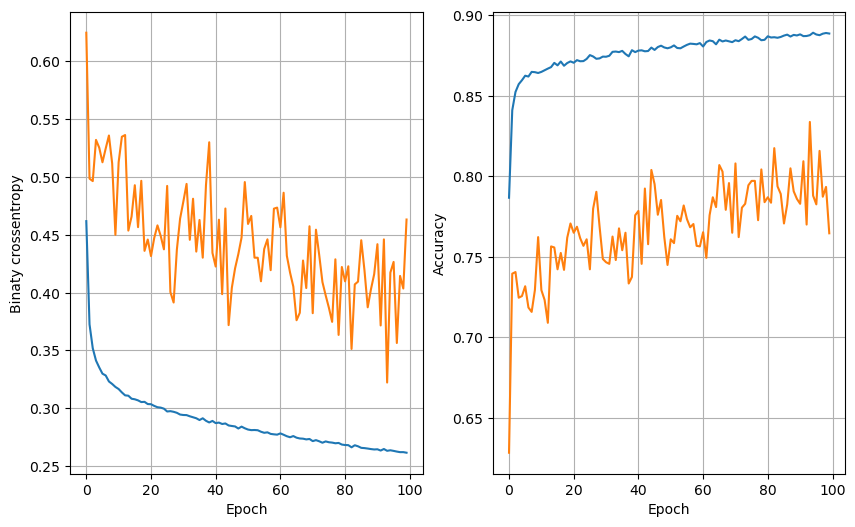

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - accuracy: 0.8732 - loss: 0.3341
16 nodes, dropout 0, lr 0.001, batch size 64


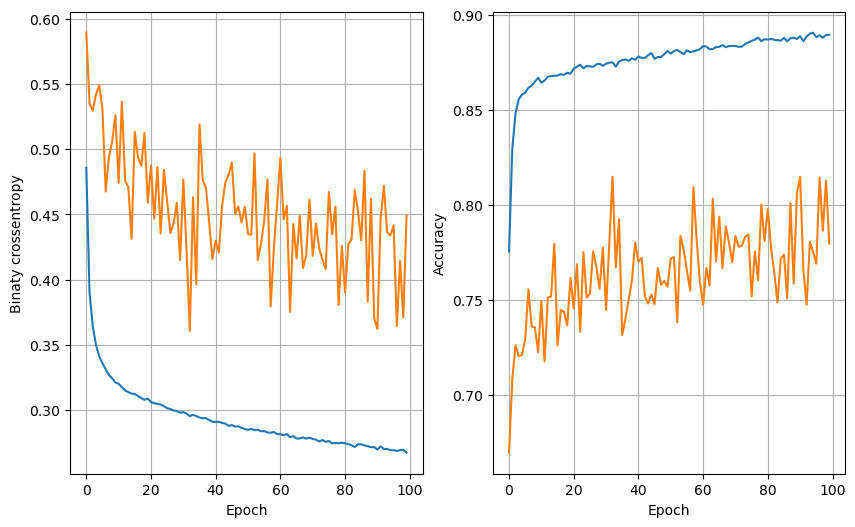

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step - accuracy: 0.8737 - loss: 0.3331
16 nodes, dropout 0, lr 0.001, batch size 128


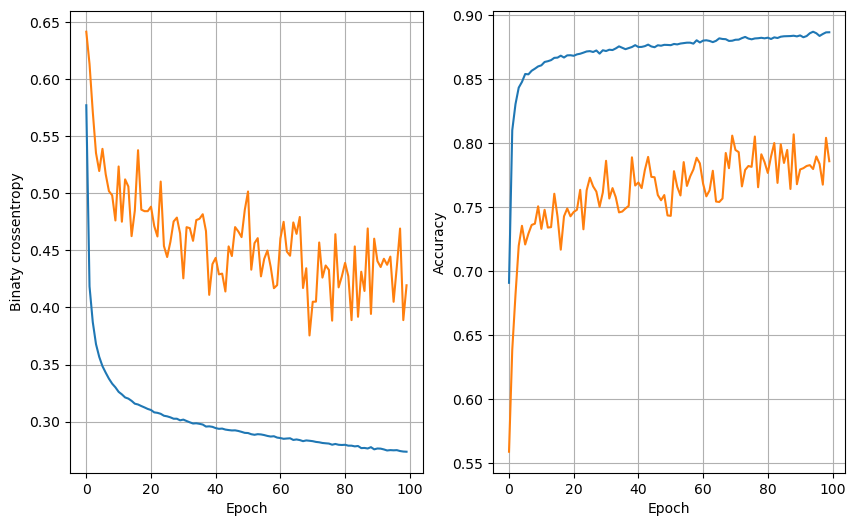

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - accuracy: 0.8712 - loss: 0.3301
16 nodes, dropout 0.2, lr 0.01, batch size 32


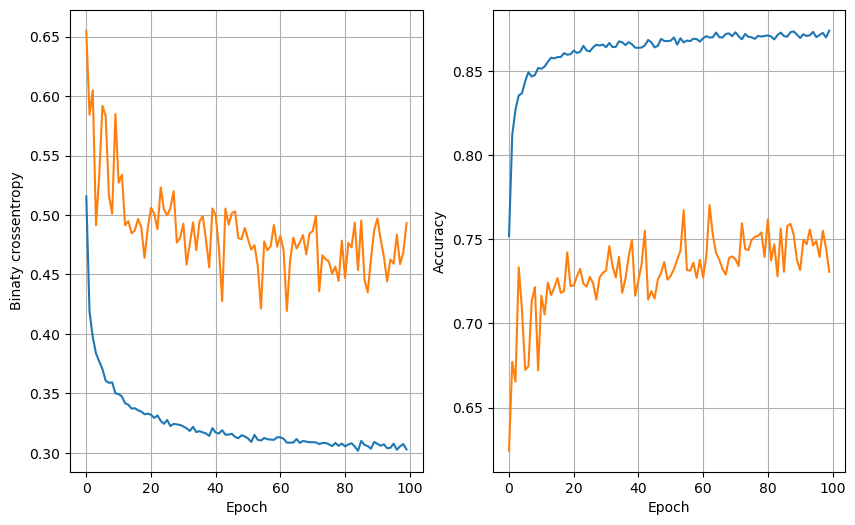

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - accuracy: 0.8778 - loss: 0.3081
16 nodes, dropout 0.2, lr 0.01, batch size 64


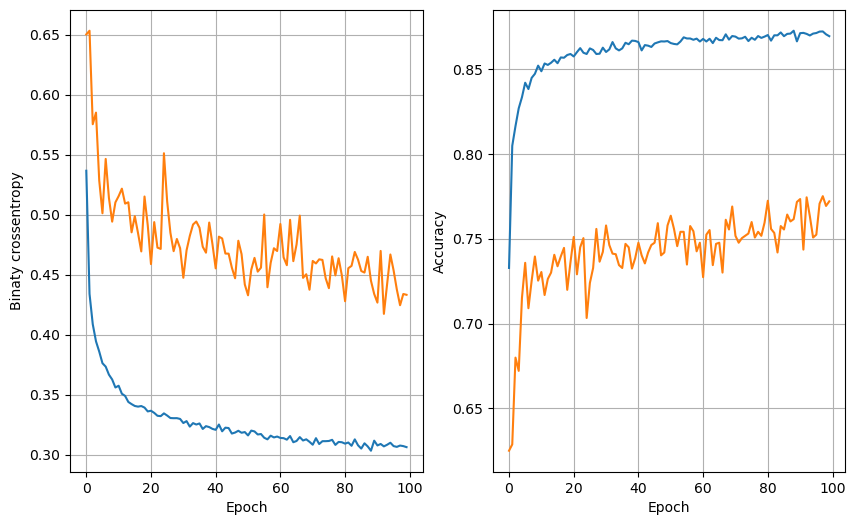

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - accuracy: 0.8709 - loss: 0.3221
16 nodes, dropout 0.2, lr 0.01, batch size 128


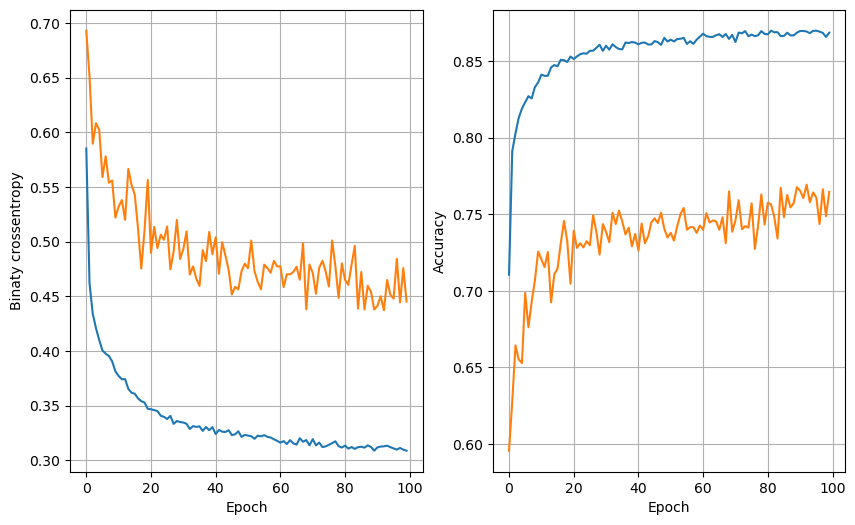

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - accuracy: 0.8694 - loss: 0.3226
16 nodes, dropout 0.2, lr 0.005, batch size 32


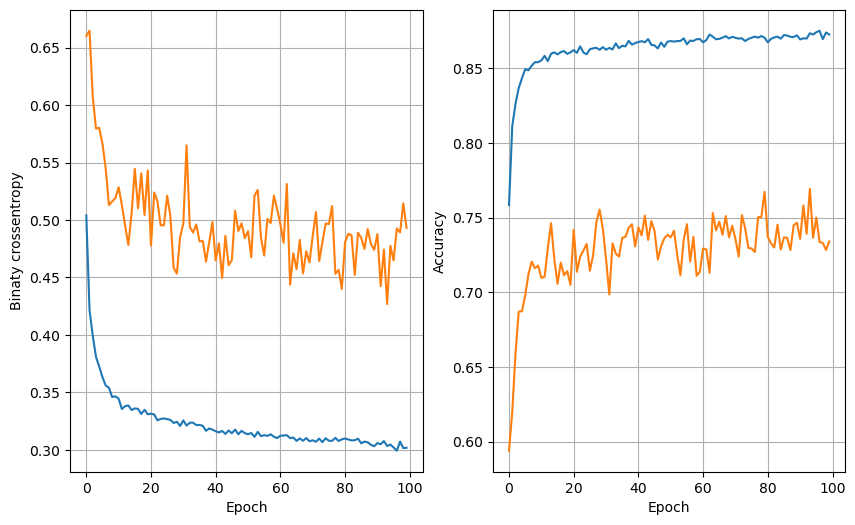

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - accuracy: 0.8786 - loss: 0.3183
16 nodes, dropout 0.2, lr 0.005, batch size 64


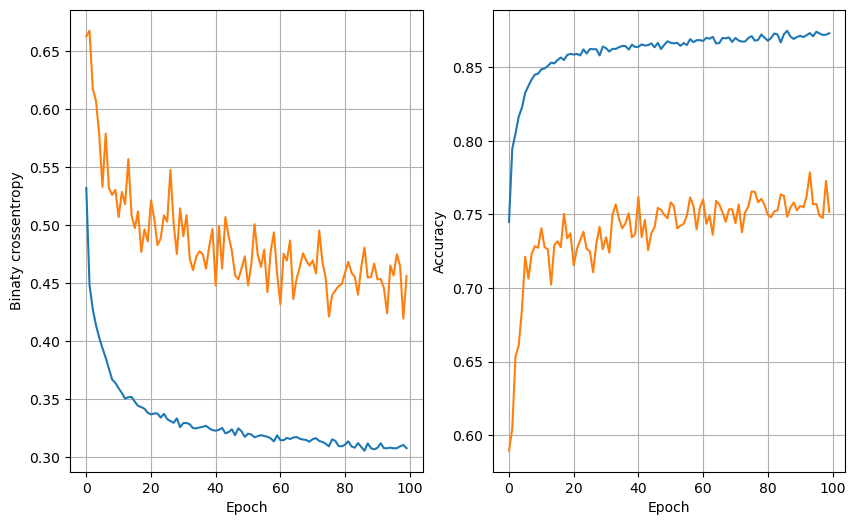

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step - accuracy: 0.8733 - loss: 0.3149
16 nodes, dropout 0.2, lr 0.005, batch size 128


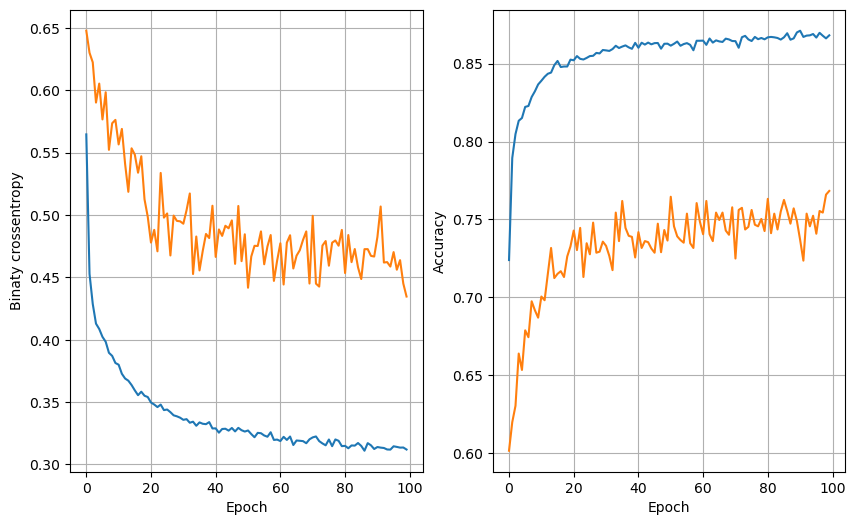

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - accuracy: 0.8752 - loss: 0.3173
16 nodes, dropout 0.2, lr 0.001, batch size 32


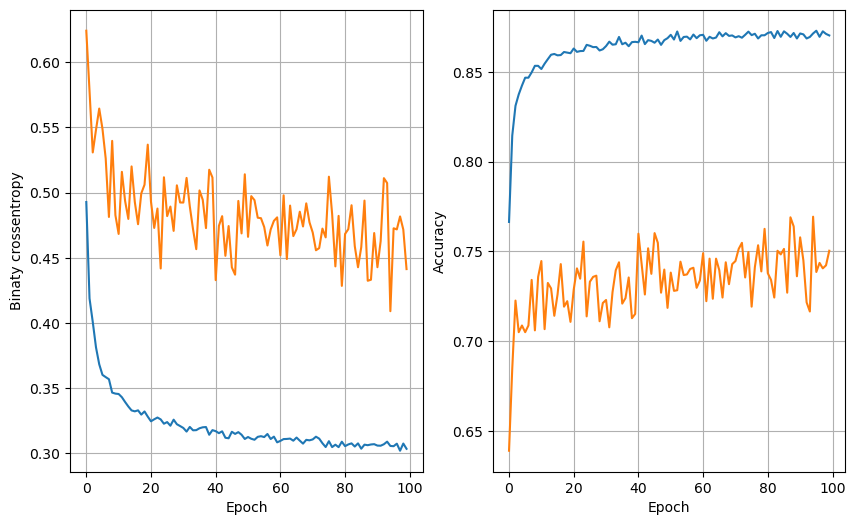

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - accuracy: 0.8735 - loss: 0.3162
16 nodes, dropout 0.2, lr 0.001, batch size 64


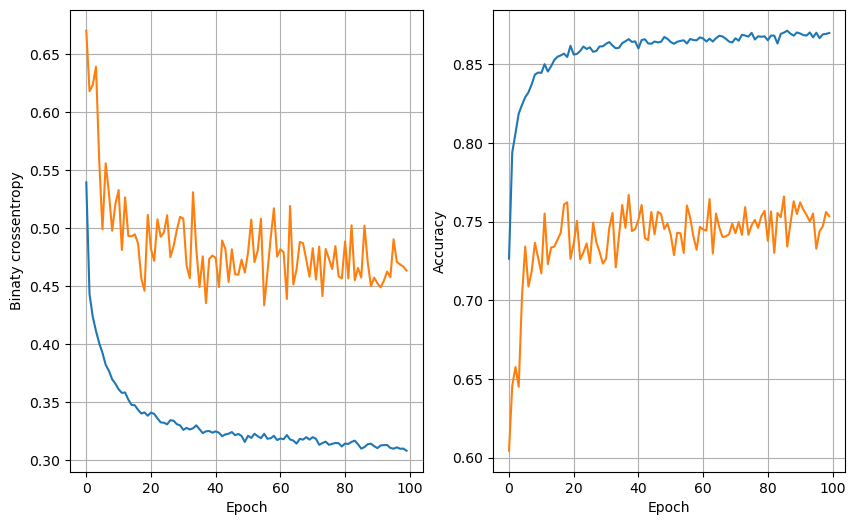

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - accuracy: 0.8761 - loss: 0.3110
16 nodes, dropout 0.2, lr 0.001, batch size 128


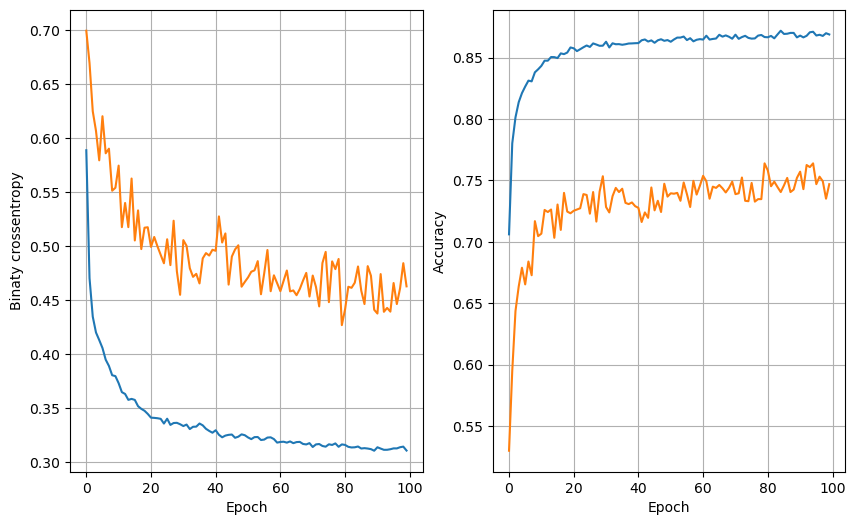

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step - accuracy: 0.8716 - loss: 0.3162
32 nodes, dropout 0, lr 0.01, batch size 32


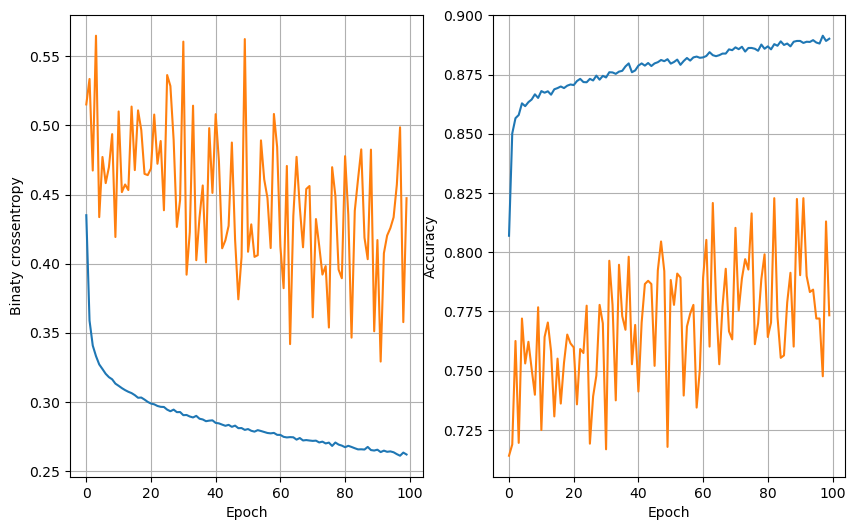

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step - accuracy: 0.8734 - loss: 0.3383
32 nodes, dropout 0, lr 0.01, batch size 64


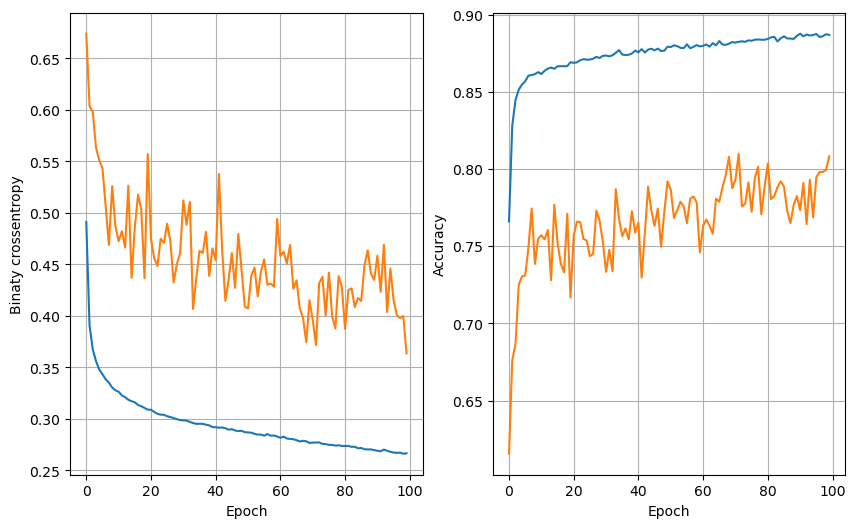

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step - accuracy: 0.8664 - loss: 0.3342
32 nodes, dropout 0, lr 0.01, batch size 128


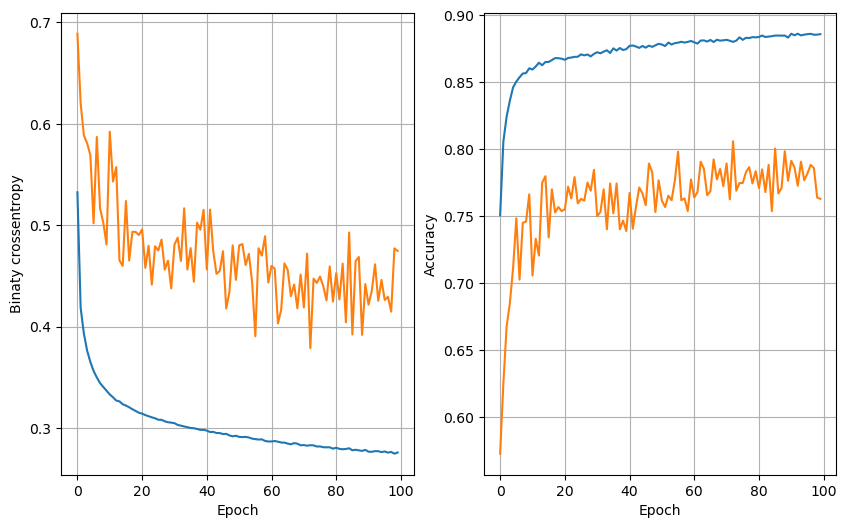

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 283us/step - accuracy: 0.8717 - loss: 0.3240
32 nodes, dropout 0, lr 0.005, batch size 32


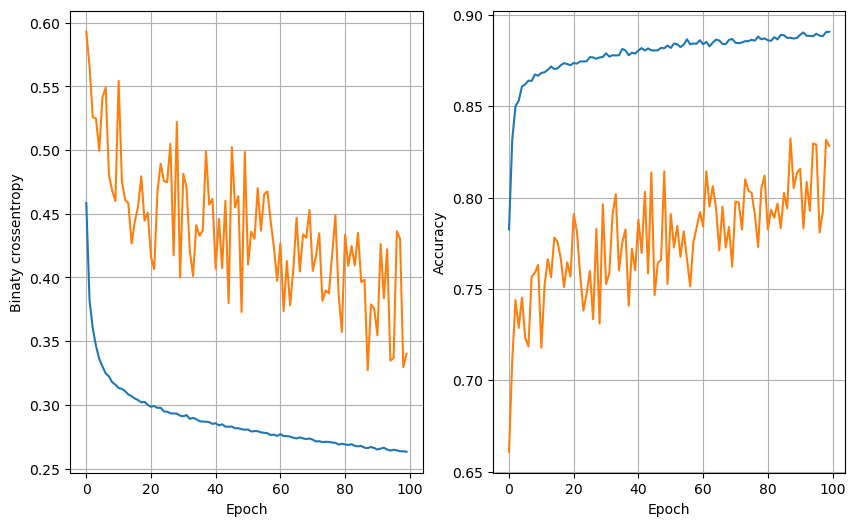

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - accuracy: 0.8676 - loss: 0.3501
32 nodes, dropout 0, lr 0.005, batch size 64


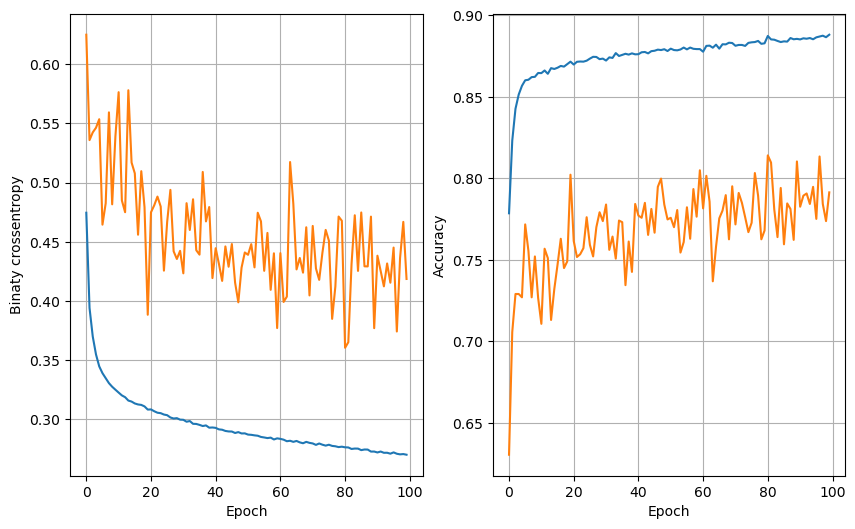

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step - accuracy: 0.8791 - loss: 0.3270
32 nodes, dropout 0, lr 0.005, batch size 128


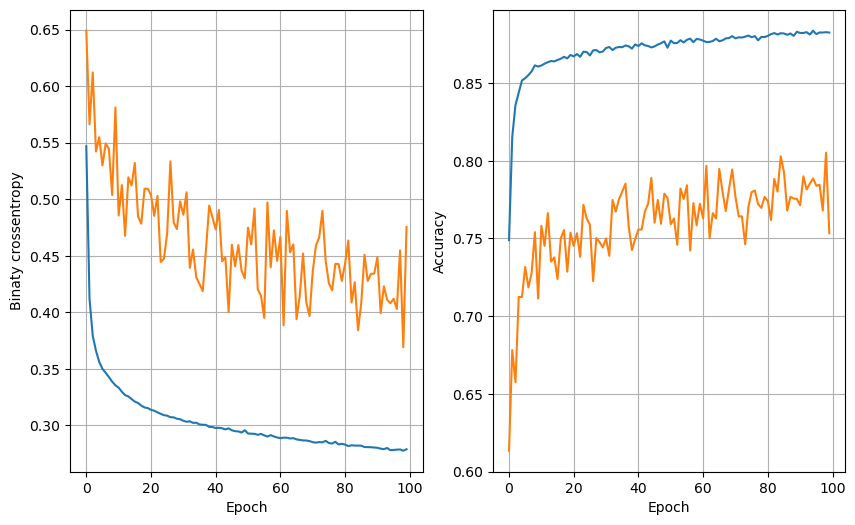

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - accuracy: 0.8718 - loss: 0.3252
32 nodes, dropout 0, lr 0.001, batch size 32


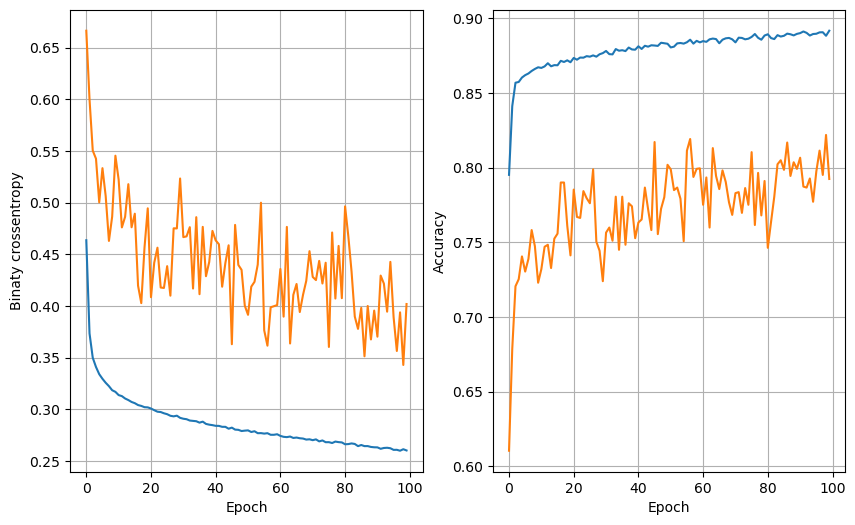

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - accuracy: 0.8723 - loss: 0.3276
32 nodes, dropout 0, lr 0.001, batch size 64


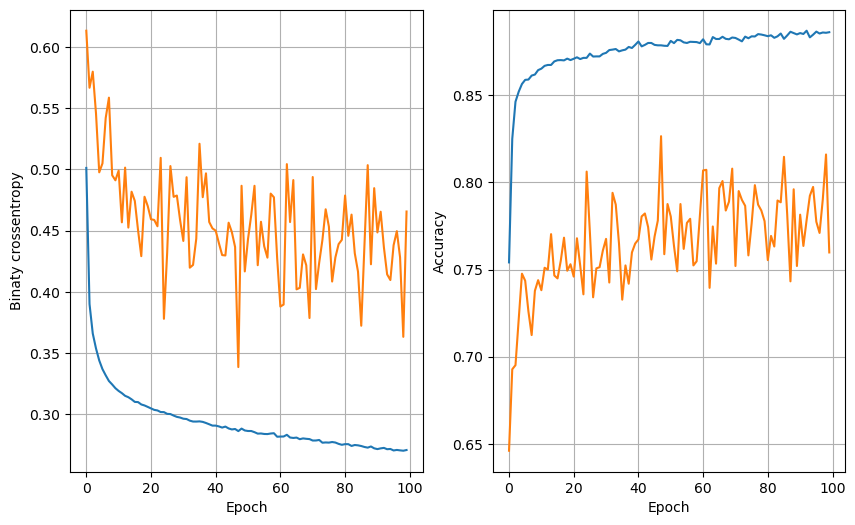

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - accuracy: 0.8729 - loss: 0.3235
32 nodes, dropout 0, lr 0.001, batch size 128


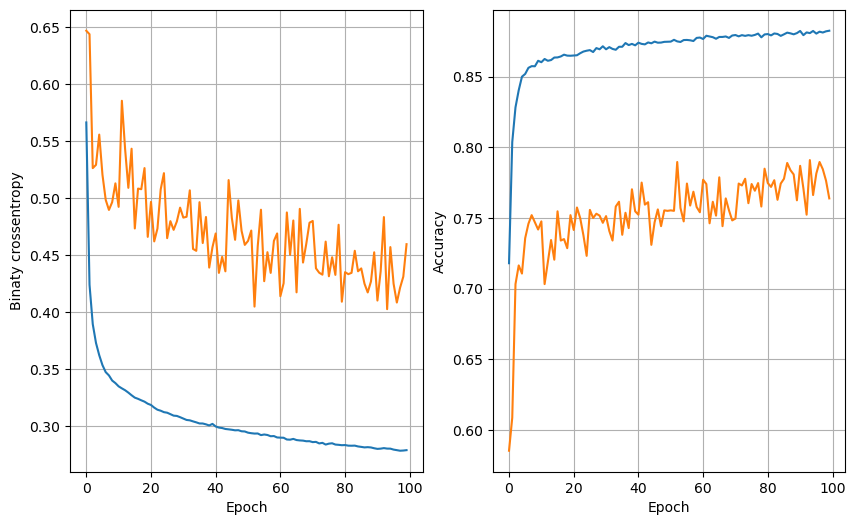

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step - accuracy: 0.8767 - loss: 0.3285
32 nodes, dropout 0.2, lr 0.01, batch size 32


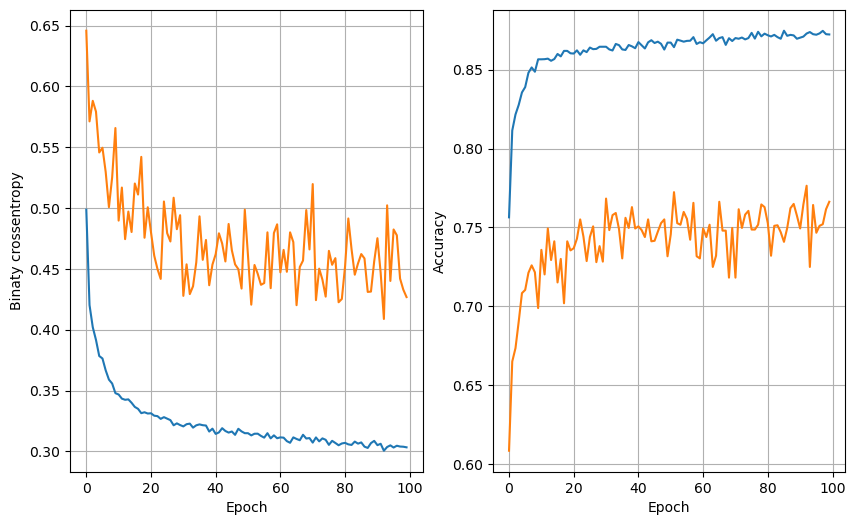

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 276us/step - accuracy: 0.8700 - loss: 0.3225
32 nodes, dropout 0.2, lr 0.01, batch size 64


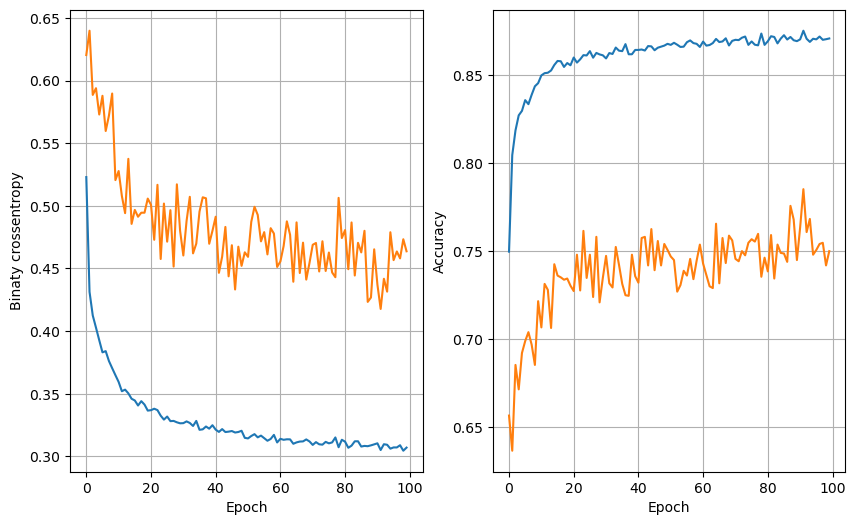

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 266us/step - accuracy: 0.8732 - loss: 0.3166
32 nodes, dropout 0.2, lr 0.01, batch size 128


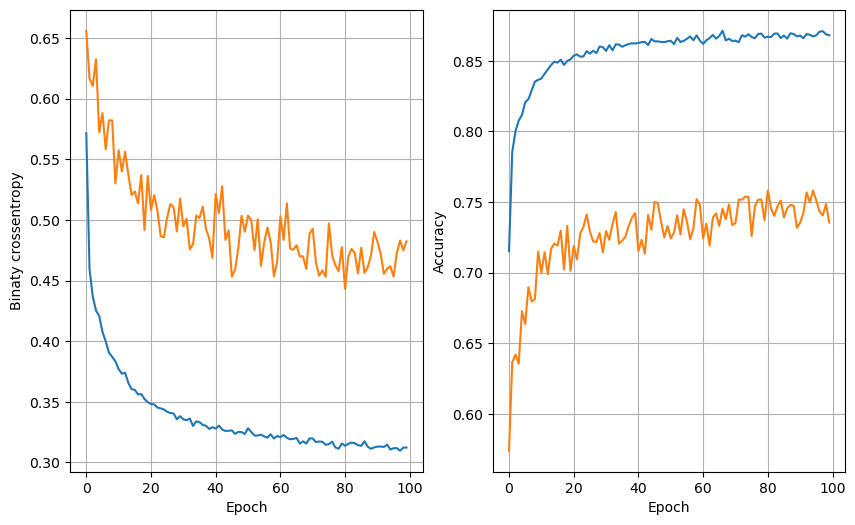

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step - accuracy: 0.8731 - loss: 0.3170
32 nodes, dropout 0.2, lr 0.005, batch size 32


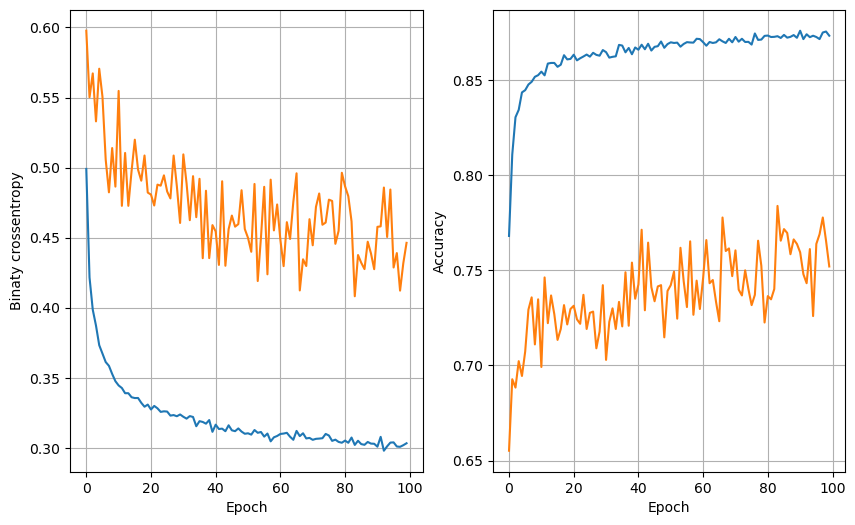

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 276us/step - accuracy: 0.8755 - loss: 0.3140
32 nodes, dropout 0.2, lr 0.005, batch size 64


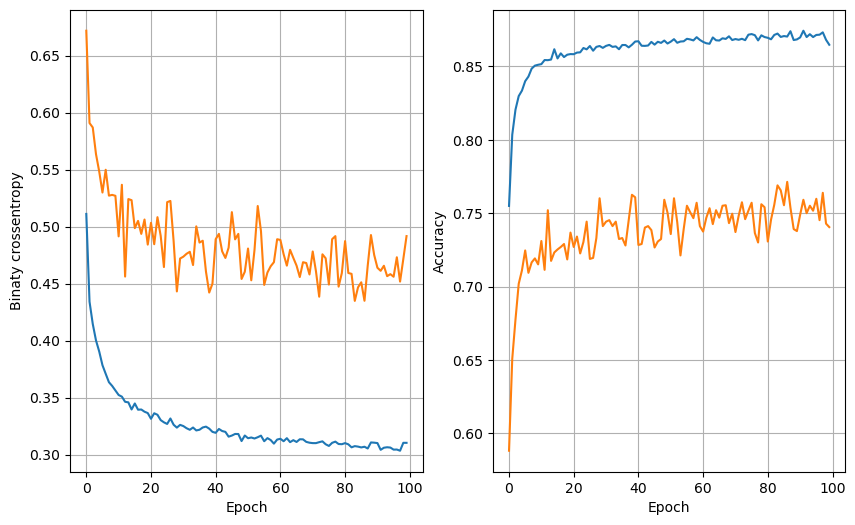

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step - accuracy: 0.8695 - loss: 0.3105
32 nodes, dropout 0.2, lr 0.005, batch size 128


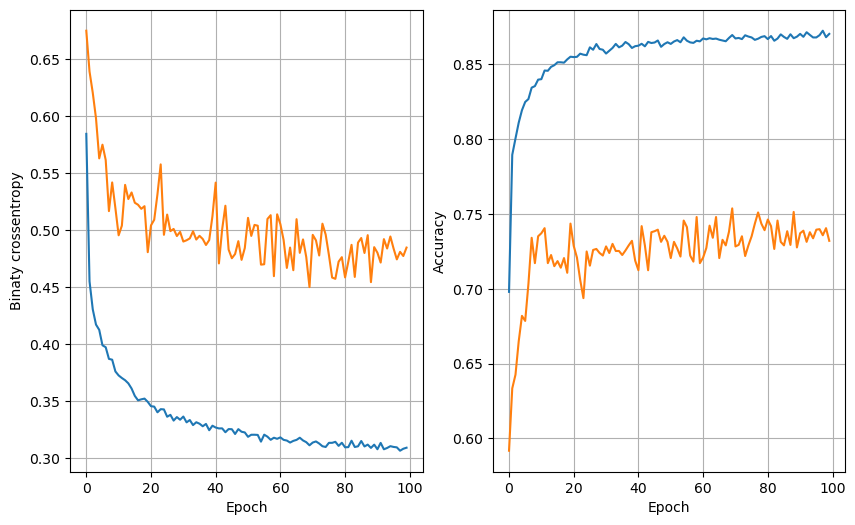

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - accuracy: 0.8722 - loss: 0.3159
32 nodes, dropout 0.2, lr 0.001, batch size 32


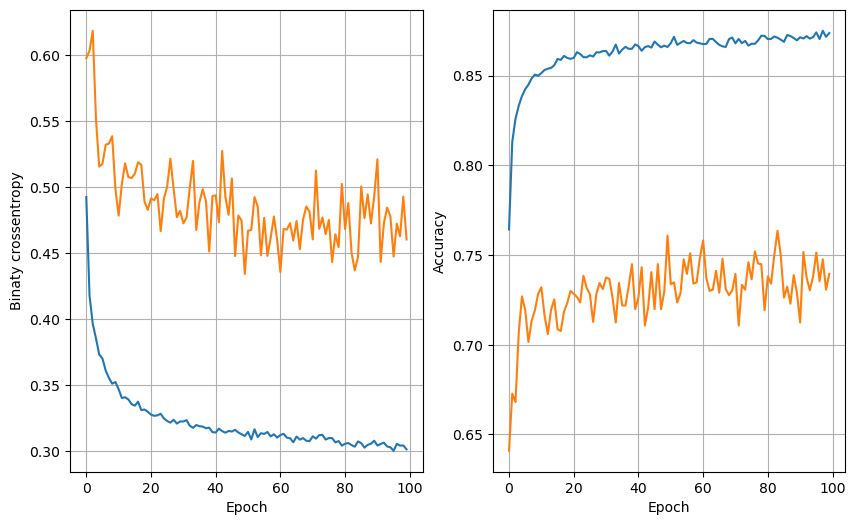

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - accuracy: 0.8714 - loss: 0.3136
32 nodes, dropout 0.2, lr 0.001, batch size 64


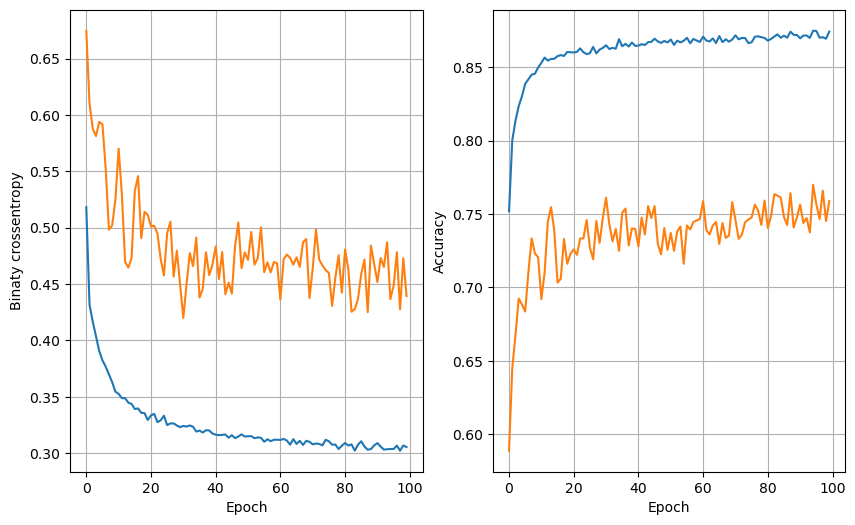

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - accuracy: 0.8715 - loss: 0.3101
32 nodes, dropout 0.2, lr 0.001, batch size 128


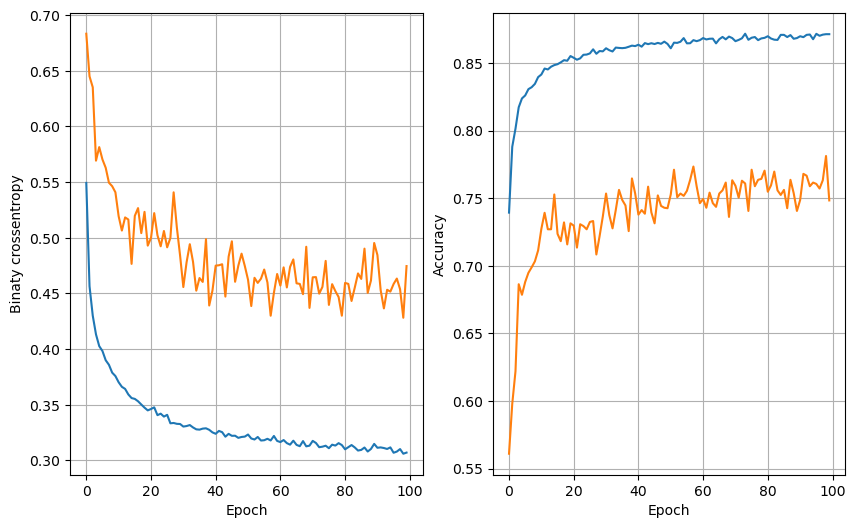

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - accuracy: 0.8729 - loss: 0.3152
64 nodes, dropout 0, lr 0.01, batch size 32


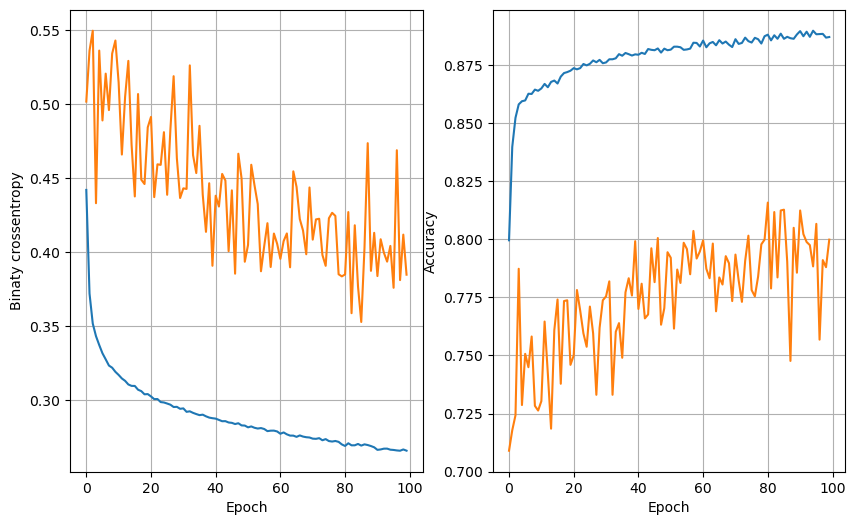

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - accuracy: 0.8694 - loss: 0.3353
64 nodes, dropout 0, lr 0.01, batch size 64


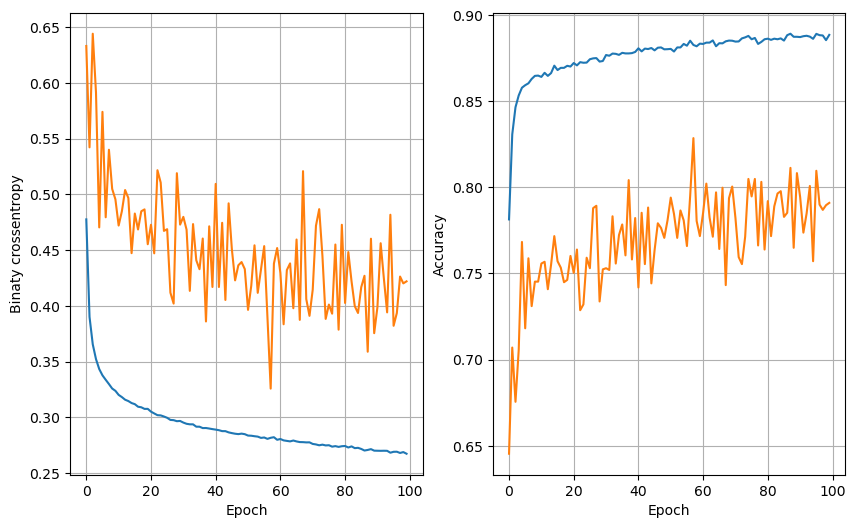

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - accuracy: 0.8752 - loss: 0.3210
64 nodes, dropout 0, lr 0.01, batch size 128


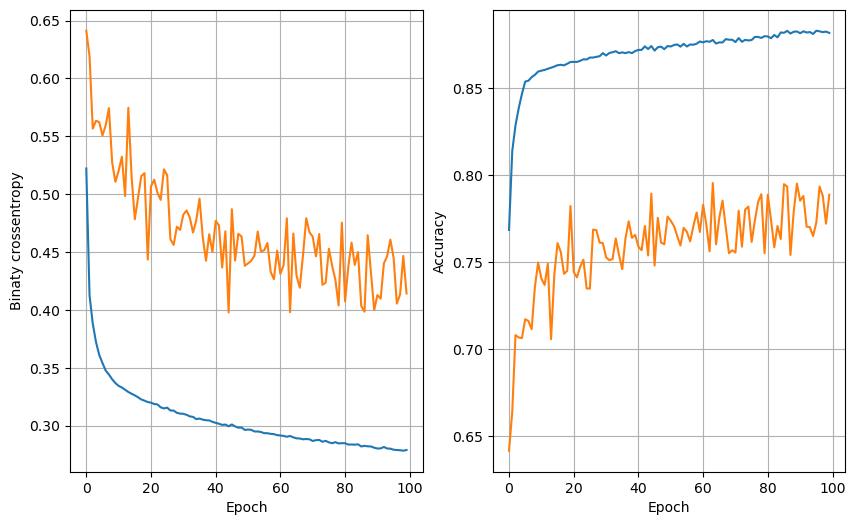

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - accuracy: 0.8694 - loss: 0.3301
64 nodes, dropout 0, lr 0.005, batch size 32


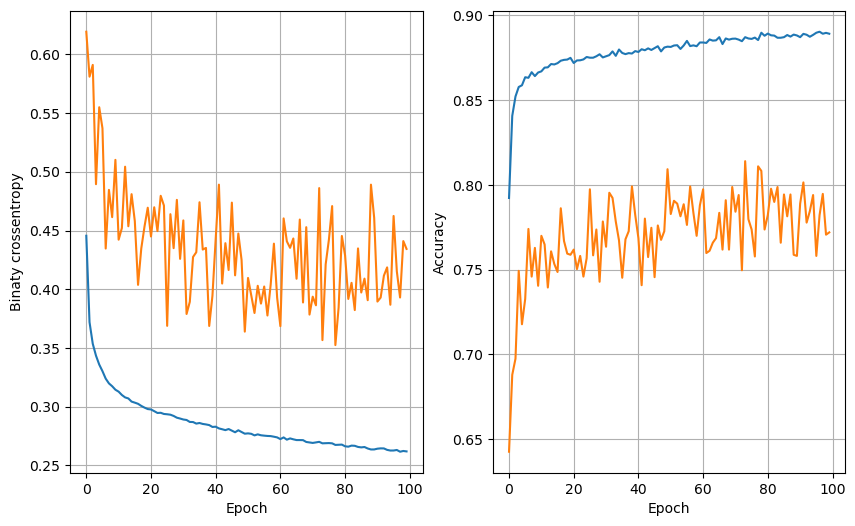

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - accuracy: 0.8708 - loss: 0.3306
64 nodes, dropout 0, lr 0.005, batch size 64


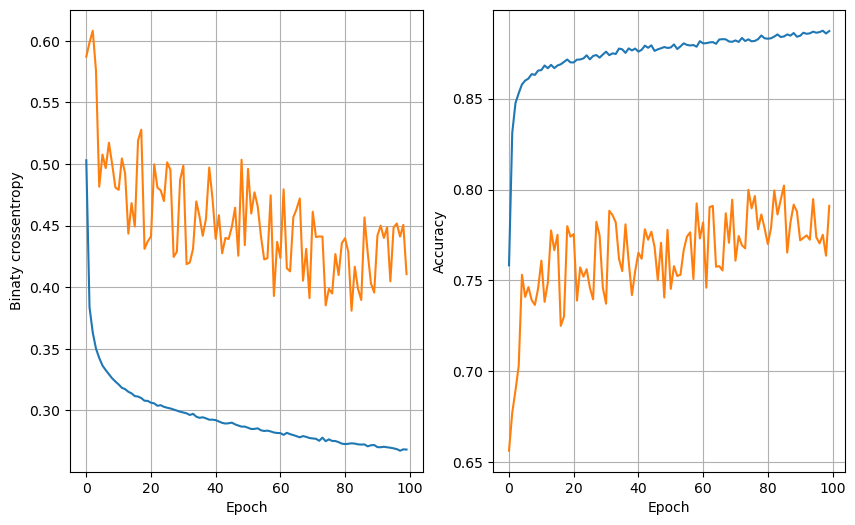

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - accuracy: 0.8615 - loss: 0.3370
64 nodes, dropout 0, lr 0.005, batch size 128


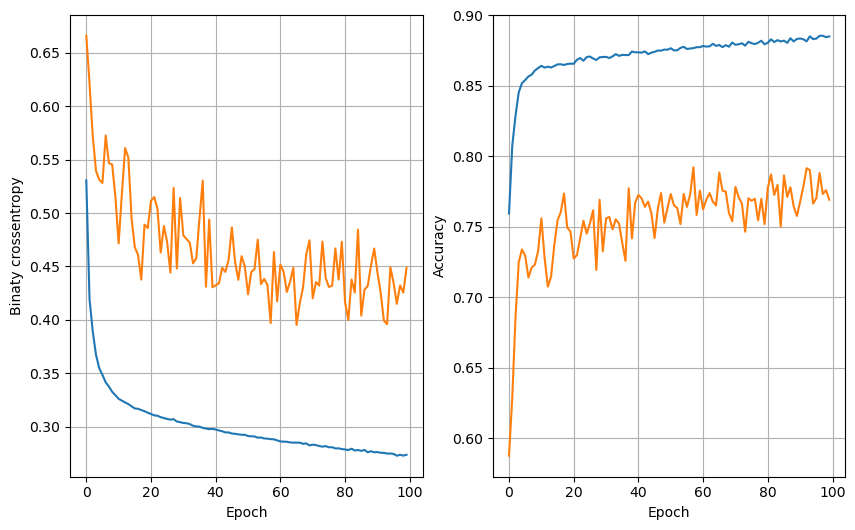

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - accuracy: 0.8752 - loss: 0.3286
64 nodes, dropout 0, lr 0.001, batch size 32


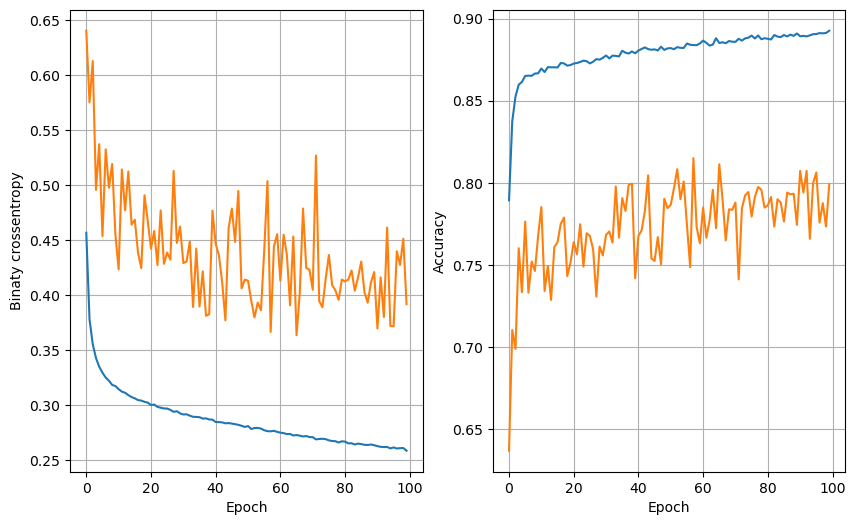

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - accuracy: 0.8771 - loss: 0.3390
64 nodes, dropout 0, lr 0.001, batch size 64


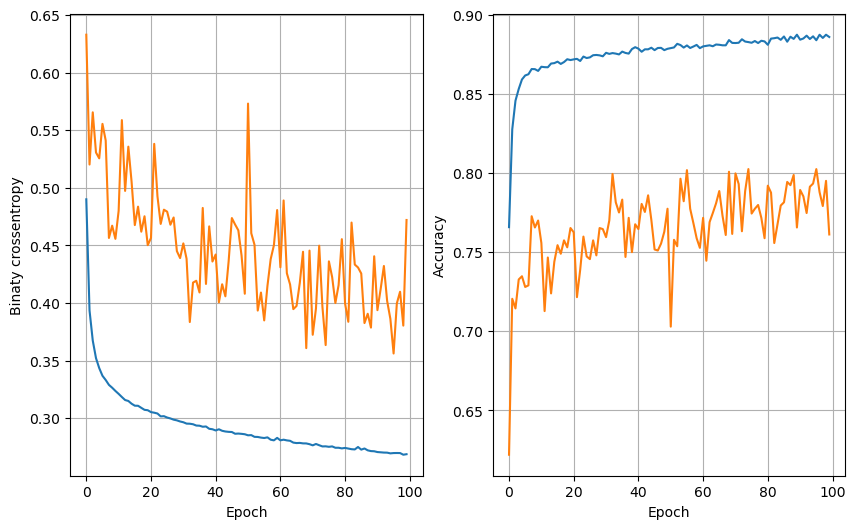

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - accuracy: 0.8769 - loss: 0.3186
64 nodes, dropout 0, lr 0.001, batch size 128


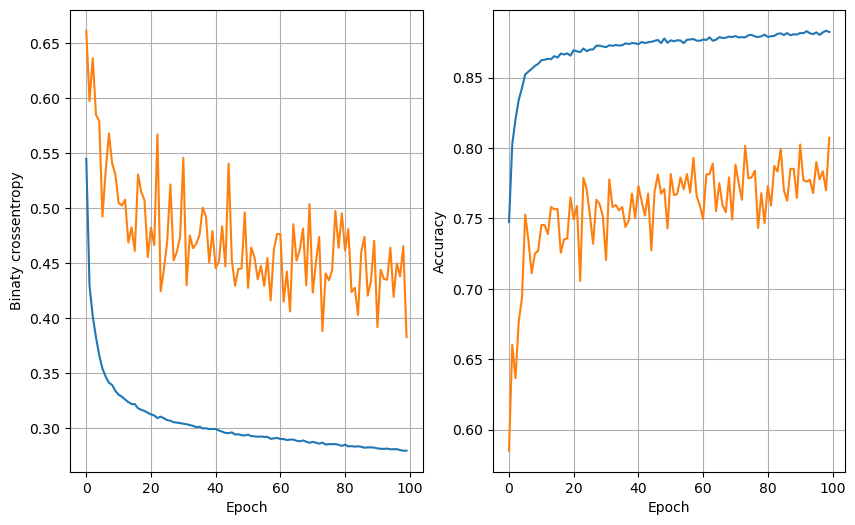

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 289us/step - accuracy: 0.8660 - loss: 0.3466
64 nodes, dropout 0.2, lr 0.01, batch size 32


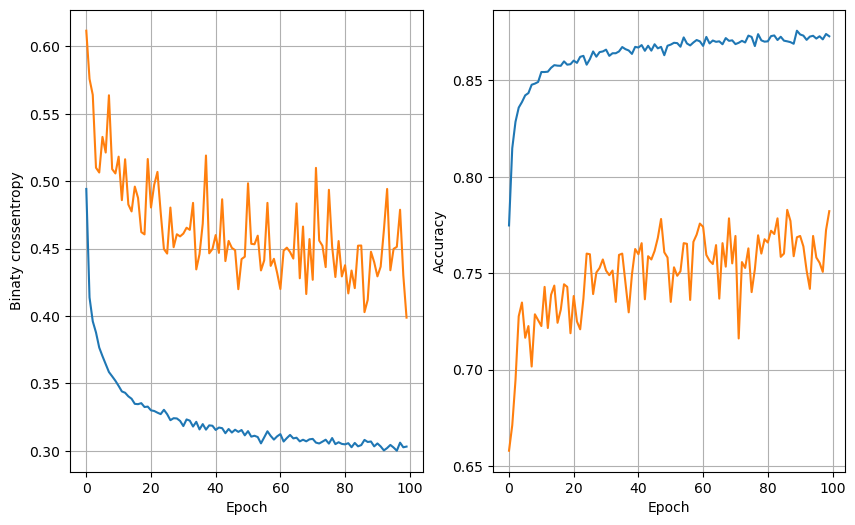

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 293us/step - accuracy: 0.8782 - loss: 0.3160
64 nodes, dropout 0.2, lr 0.01, batch size 64


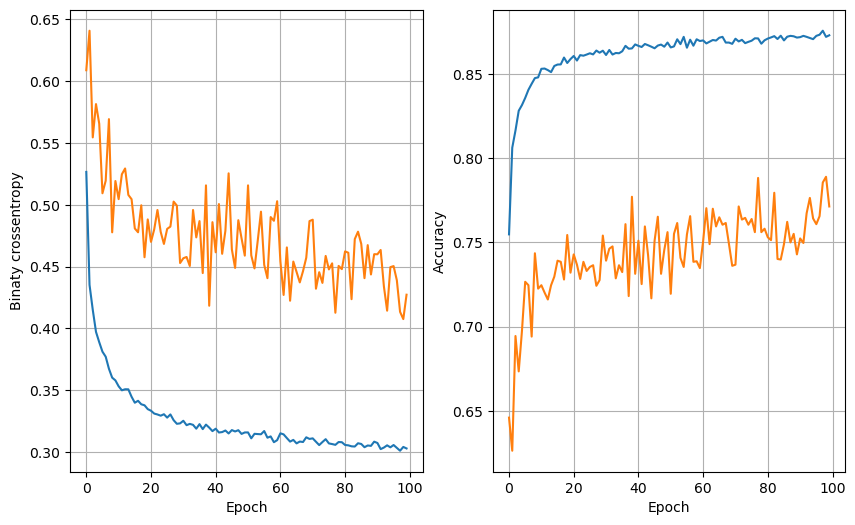

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - accuracy: 0.8727 - loss: 0.3150
64 nodes, dropout 0.2, lr 0.01, batch size 128


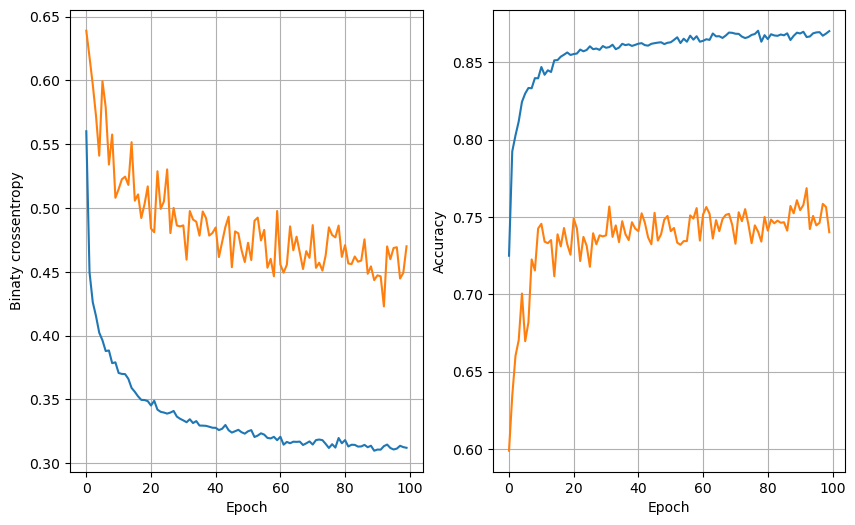

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step - accuracy: 0.8723 - loss: 0.3173
64 nodes, dropout 0.2, lr 0.005, batch size 32


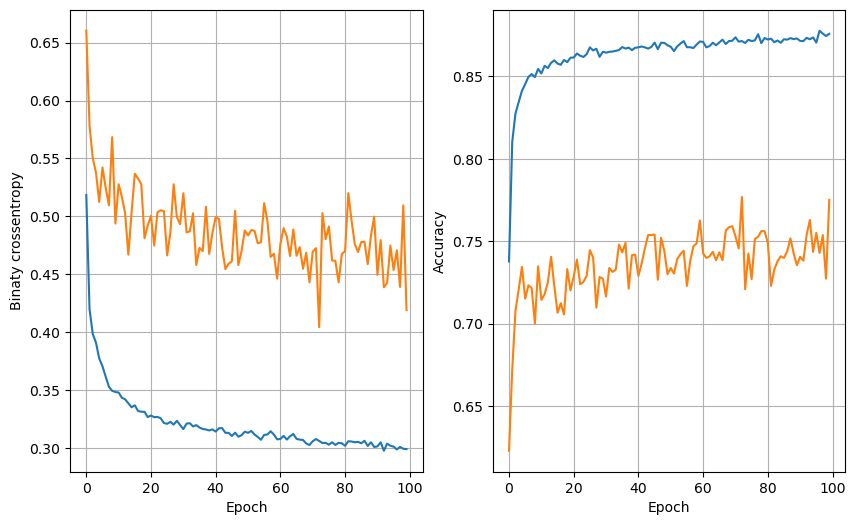

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step - accuracy: 0.8680 - loss: 0.3202
64 nodes, dropout 0.2, lr 0.005, batch size 64


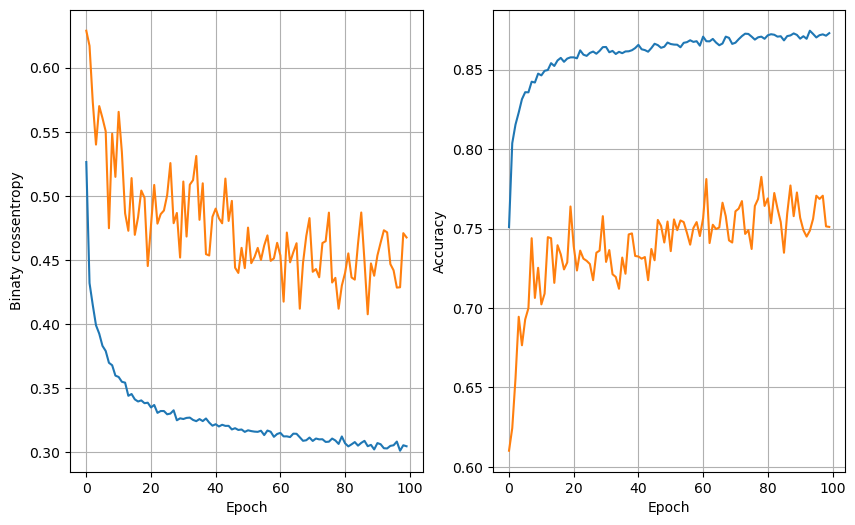

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step - accuracy: 0.8745 - loss: 0.3135
64 nodes, dropout 0.2, lr 0.005, batch size 128


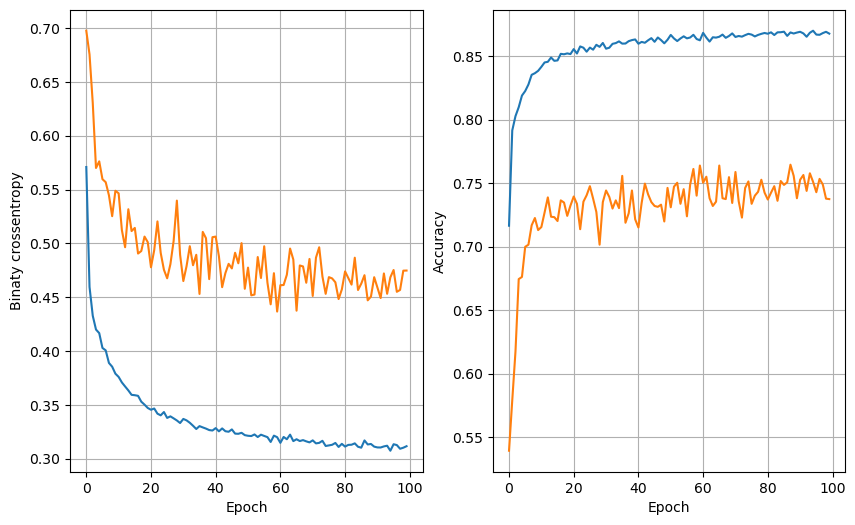

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 283us/step - accuracy: 0.8732 - loss: 0.3166
64 nodes, dropout 0.2, lr 0.001, batch size 32


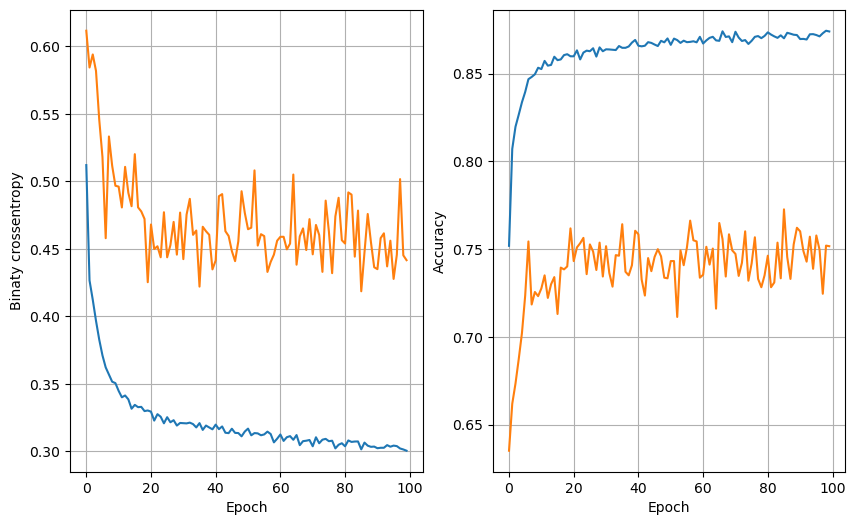

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - accuracy: 0.8712 - loss: 0.3165
64 nodes, dropout 0.2, lr 0.001, batch size 64


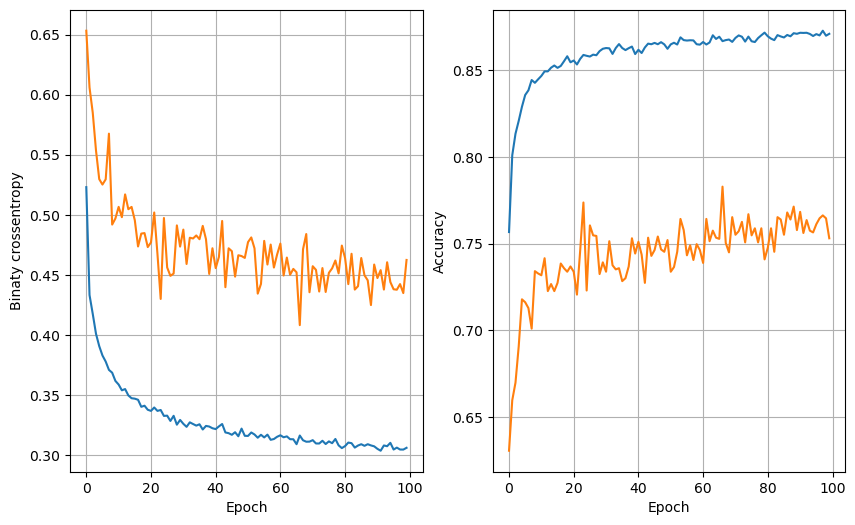

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - accuracy: 0.8710 - loss: 0.3115
64 nodes, dropout 0.2, lr 0.001, batch size 128


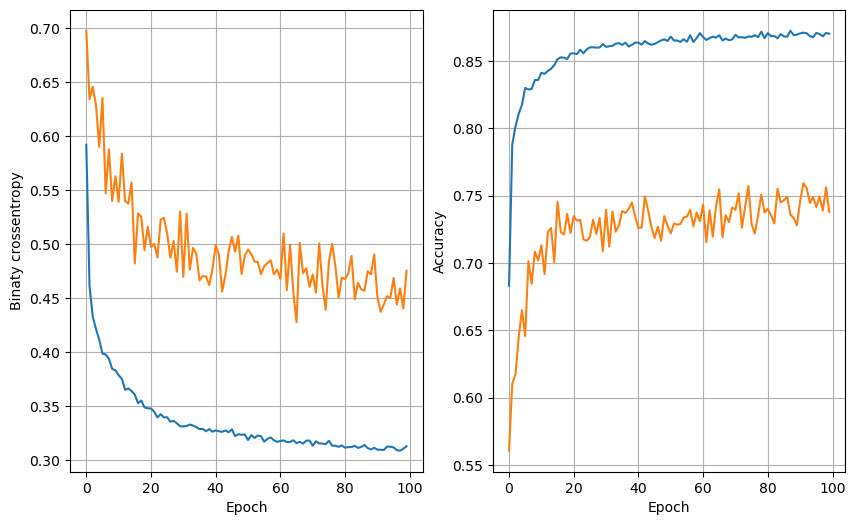

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - accuracy: 0.8764 - loss: 0.3129


In [138]:
least_val_loss = float('inf')
least_val_loss= None
epochs= 100
for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.01, 0.005, 0.001]: 
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
                model, history= train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                val_loss = model.evaluate(x_valid, y_valid)
                if val_loss is not None and least_val_loss is not None and val_loss < least_val_loss:
                #if val_loss < least_val_loss:
                    least_val_loss= val_loss
                    least_val_loss_model